# GP: Clean And Analyze Employee Exit Surveys

**by Fernando Romero**

In this Data Science project, we'll analyze exit surveys from the Department of Education and Training (DETE) and the Technical and Further Education (TAFE) Institute in Queensland, Australia. If you're interested, you can find both datasets here: [DETE dataset](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [TAFE dataset](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

We are assuming the role of a Data Science team. Our stakeholders would like to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

These are the guiding questions, but the real purpose of this project is to apply data cleaning and merging tools in a real world data set. In short, we'll leave the data ready for future analysis.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

I must say that I constantly verify the changes, which makes the code larger, but this ensures no errors.
Anyway, I truly hope you find this project useful and interesting!

# Data Exploration and Initial Cleaning

In [1]:
#We first import the libraries we'll be using and start reading our datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
print(dete_survey.shape)
dete_survey.head()

(822, 56)


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
#initial reason check
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
#initial reason numbers
dete_survey['Job dissatisfaction'].value_counts()

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [7]:
print(tafe_survey.shape)
tafe_survey.head()

(702, 72)


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [9]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [10]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

After exploring both dataframes and their columns, we can make some observations:

- The `dete_survey` dataframe has 822 entries and the `tafe_survey` has 702.
- In both datasets, there are many unnecesary columns for the purposes of this project. Some of them lack almost all of the entries: it's possible that the NaN values must be replaced with a different criteria (e.g. the missing values in the 'Aboriginal' column in the `dete_survey` dataframe should not be neccesarily considered NaN, but rather something like 'Not Stated').
- Both dataframes share many of the same columns, however, the column names are different. We'll have to adjust them.

In [11]:
#Replacing NaN values with 'Not Stated'
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [12]:
#after some consideration, we'll drop these columns:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [13]:
print(dete_survey.shape)
dete_survey.head()

(822, 56)


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [14]:
print(tafe_survey.shape)
tafe_survey.head()

(702, 72)


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


# Clean Column Names

After eliminating columns we definitely won't need, we'll equalize column names to set the way for the dataframes' combination.

In [15]:
#These are all the columns in the dete_survey dataframe
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

To make things easier, we'll update the column names by:
- Making them lowercase
- Removing any whitespaces in the end of strings
- Replacing spaces with underscores ('_')

In [16]:
dete_survey.columns = dete_survey.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey = dete_survey.rename({'separationtype': 'separation_type'}, axis=1)

In [17]:
dete_survey.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'infor

For the `tafe_survey` dataframe, however, we'll have to manually rename the columns:

In [18]:
mapping = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separation_type',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey = tafe_survey.rename(mapping, axis=1)

In [19]:
tafe_survey.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal developme

Now that's done, let's look again at the unique values for `separation_type`:

In [20]:
dete_survey['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [21]:
tafe_survey['separation_type'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

# Filter the Data

The purpose of the desired analysis was to investigate the resignation cases. Therefore, we'll select only the rows for which that is true.

In [22]:
#We modify the separation types in the dete_survey dataframe so that we equalize the 'Resignation' types
dete_survey['separation_type'] = dete_survey['separation_type'].str.split('-').str[0]

In [23]:
#We are making a subset for which 'Resignation' is True in dete_survey
dete_resignations = dete_survey[dete_survey['separation_type'] == 'Resignation'].copy() 
   

dete_resignations['separation_type'].value_counts()

Resignation    311
Name: separation_type, dtype: int64

In [24]:
#We are making a subset for which Resignation is True in tafe_survey
tafe_resignations = tafe_survey[tafe_survey['separation_type'] == 'Resignation'].copy()

tafe_resignations['separation_type'].value_counts()

Resignation    340
Name: separation_type, dtype: int64

# Data verification

To avoid serious errors, we need to make sure our data makes sense. Let's observe the years to see if we find any inconsistencies.

If there are serious discrepancies, we shouldn't continue with the analysis.

In [25]:
#we first observe the unique date values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [26]:
#we extract the year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [27]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [28]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

So far everything seems in order. There is nothing that suggests the dates are inconsistent.

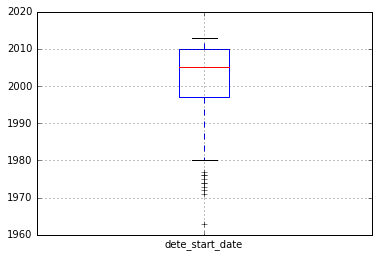

In [29]:
#We can also plot the values to see if we find anything extraordinary
dete_resignations.boxplot(column='dete_start_date')

In [30]:
#Checking whether there are start dates bigger than cease dates
dete_resignations[dete_resignations['dete_start_date'] > dete_resignations['cease_date']]

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,kept_informed,wellness_programs,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


The previous dataframe has 0 rows for which the criteria above is true. That means, once again, that the dates match: the start dates are prior to the cease dates, which is what you'd logically expect in a valid timeframe.

In [31]:
#Checking tafe_resignations
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

It seems that the date values make sense and don't have any inconsistencies. Perhaps the only issue is that the `dete_resignations` dataframe span these dates:
```
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
```
While the `tafe_resignations` dataframe span these:
```
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
```
But, depending of the future analysis, it may not be that important all things considered. We'll next create a new column that will hold the years of service in the organization.

# Institute Service Column

In [32]:
#we only need to calculate the years of service with a vectorized substraction
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,wellness_programs,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,N,N,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


We also need to create a column that will state, in a simple manner, whether someone resigned due to some form of dissatisfaction.

In [33]:
#Checking type of values in the tafe_survey dataframe
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [34]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [35]:
#Checking type of values in the dete_survey dataframe
dete_resignations['job_dissatisfaction'].value_counts(dropna=False)

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [36]:
dete_resignations['dissatisfaction_with_the_department'].value_counts(dropna=False)

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64

In [37]:
#Let's confirm completely that the dete_resignations dataframe 
#doesn't require any transformation in its columns
dete_dissatisfied = dete_resignations[[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload']]
print(dete_dissatisfied.head(2))
print('\n')
print(dete_dissatisfied.isnull().sum())

   job_dissatisfaction  dissatisfaction_with_the_department  \
3                False                                False   
5                False                                False   

   physical_work_environment  lack_of_recognition  lack_of_job_security  \
3                      False                False                 False   
5                      False                False                 False   

   work_location  employment_conditions  work_life_balance  workload  
3          False                  False              False     False  
5          False                   True              False     False  


job_dissatisfaction                    0
dissatisfaction_with_the_department    0
physical_work_environment              0
lack_of_recognition                    0
lack_of_job_security                   0
work_location                          0
employment_conditions                  0
work_life_balance                      0
workload                               0


As we can see, the `dete_resignations` dataframe already categorizes the values as `True` or `False`, and it doesn't contain null values. This means we won't need to apply the next function to transform the values in this dataframe. The idea is to change the strings in the `tafe_resignations` columns that refer to job dissatisfaction to True, False or NaN. This way we'll be able to create the column we discussed in both dataframes.

In [38]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [39]:
#apply function element-wise to tafe_resignations and create new column:

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

#make a copy for simplicity
tafe_resignations_up = tafe_resignations.copy()

#we verify that the dataframe remains correct
print(tafe_resignations_up.head(2))
print('\n')
#we verify that the dissatisfied column was created and has matching values
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

             id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separation_type  \
3  Non-Delivery (corporate)      2010.0     Resignation   
4       Delivery (teaching)      2010.0     Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
3                                -                       

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Now, for the `dete_resignations` dataframe we'll just create the `dissatisfied` column since its values are already in a boolean form.

In [40]:
#we'll use the previously defined dete_dissatisfied dataframe -- which contains the relevant dissatisfaction columns
#if any value in these columns is True, then assign True to the new 'dissatisfied' column:
dete_resignations['dissatisfied'] = dete_dissatisfied.any(axis=1, skipna=False)

#make a copy for simplicity
dete_resignations_up = dete_resignations.copy()

#we verify that the dataframe remains correct
print(dete_resignations_up.head(2))
print('\n')
#we verify that the dissatisfied column was created and has matching values
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

   id separation_type  cease_date  dete_start_date  role_start_date  \
3   4     Resignation      2012.0           2005.0           2006.0   
5   6     Resignation      2012.0           1994.0           1997.0   

           position classification              region         business_unit  \
3           Teacher        Primary  Central Queensland                   NaN   
5  Guidance Officer            NaN      Central Office  Education Queensland   

     employment_status      ...       health_&_safety  gender    age  \
3  Permanent Full-time      ...                     A  Female  36-40   
5  Permanent Full-time      ...                   NaN  Female  41-45   

   aboriginal  torres_strait  south_sea  disability  nesb  institute_service  \
3         NaN            NaN        NaN         NaN   NaN                7.0   
5         NaN            NaN        NaN         NaN   NaN               18.0   

   dissatisfied  
3         False  
5          True  

[2 rows x 58 columns]




False    162
True     149
Name: dissatisfied, dtype: int64

While the last process might seem complicated, now we have a column indicating if an employee resigned because they were dissatisfied in some way. This will be very useful later on.

To recap, we've accomplished the following:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way

# Combine the Data

We're now ready to merge both dataframes. In order to keep track of things, though, we'll add some information in each dataframe:

In [41]:
#we create columns with indicators in each dataframe
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

#now we can finally combine both dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=False)
#we measure the non null values
combined.notnull().sum().sort_values()

torres_strait                                                                                                        0
south_sea                                                                                                            3
aboriginal                                                                                                           7
disability                                                                                                           8
nesb                                                                                                                 9
business_unit                                                                                                       32
Main Factor. Which of these was the main factor for leaving?                                                        96
classification                                                                                                     161
InductionInfo. Topic:Did you undertake a Corpora

As a way to keep the most valuable data, and after some consideration, we'll drop any remaining columns that have less than 500 non null values:

In [42]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separation_type      651
dtype: int64

In [43]:
#let's see how our final dataframe looks
print(combined.shape)
combined_updated.head()

(651, 123)


,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separation_type
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation
9,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation
11,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation


We're almost ready to perform an analysis. But first, though, we'll have to clean up the `institute_service` column. Let's inspect it further to see the problem:

In [44]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [45]:
#clean and equalize the years
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)').copy()
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float').copy()

combined_updated['institute_service_up'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_up, dtype: int64

In order to get a bigger picture, we'll measure the years of service using the next categories:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [46]:
#categorizing function
def career_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 >= val <=6:
        return 'Experienced'
    elif 7 >= val <=10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'

In [47]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_cat).copy()
#we verify the changes
combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



New            193
Veteran        136
Established    123
Experienced     83
Name: service_cat, dtype: int64

In [48]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [49]:
#fillna to False, since it's the most common outcome
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False).copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [50]:
#verify values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

# Initial Analysis

As an initial step, we can try to observe what type of category is the most likely to resign due to dissatisfaction. The `pivot_table` method will aggregate the data and the `plot` method will display it.

In [51]:
pv_combined = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
pv_combined.head()

,dissatisfied
service_cat,
Established,0.414634
Experienced,0.277108
New,0.295337
Veteran,0.485294


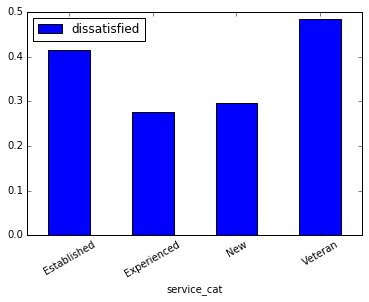

In [52]:
pv_combined.plot(kind='bar',rot=30)

There it is: the long cleaning process and the beginnings of an analysis.
Thank you!